# imports

In [14]:
import numpy as np
from scipy.special import expit
import arviz as ar
from scipy.stats import bernoulli, uniform, norm, beta, gamma
from sklearn.metrics import auc

DATA = '/Users/erikjohnson/python/py_packages/Bayesian-Vaccine-Efficacy/data'
HOME = '/Users/erikjohnson/python/py_packages/Bayesian-Vaccine-Efficacy'

# my imports
os.chdir(HOME)
print(f'working dir = {os.getcwd()}')
from utilities.plotUtils import *
from library import *
from utilities.utilityFunctions import pickle_object, unpickle_object

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


working dir = /Users/erikjohnson/python/py_packages/Bayesian-Vaccine-Efficacy


# experiment 1

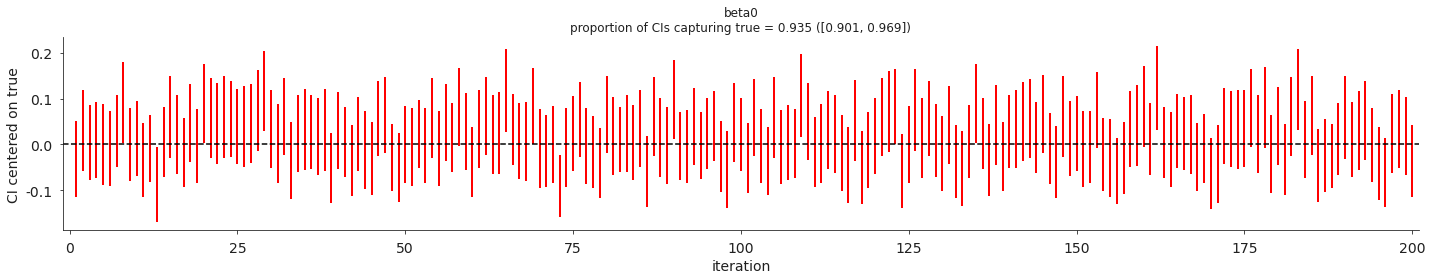

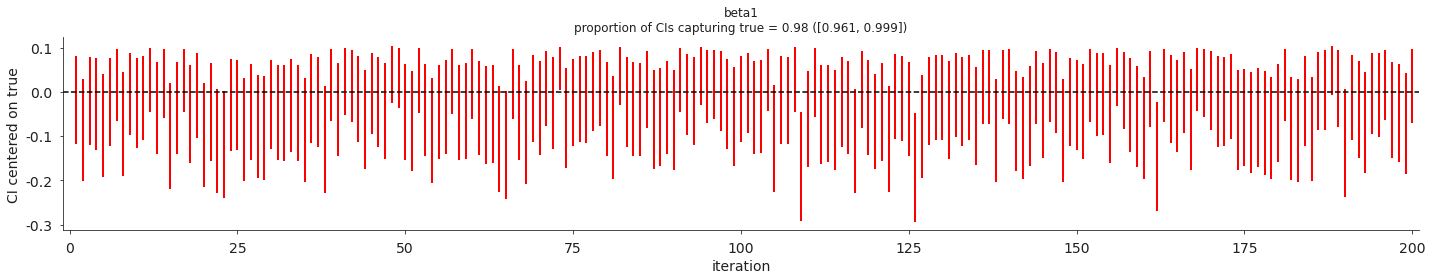

In [16]:
name = 'exp1'
df = unpickle_object(os.path.join(DATA, f'{name}_ci_df.pkl'))
params = ['beta0', 'beta1']

for param in params:
    outpath = os.path.join(HOME, f'figs/{name}_{param}.png')
    create_ci_plots(df, param, outpath)

# experiment 2

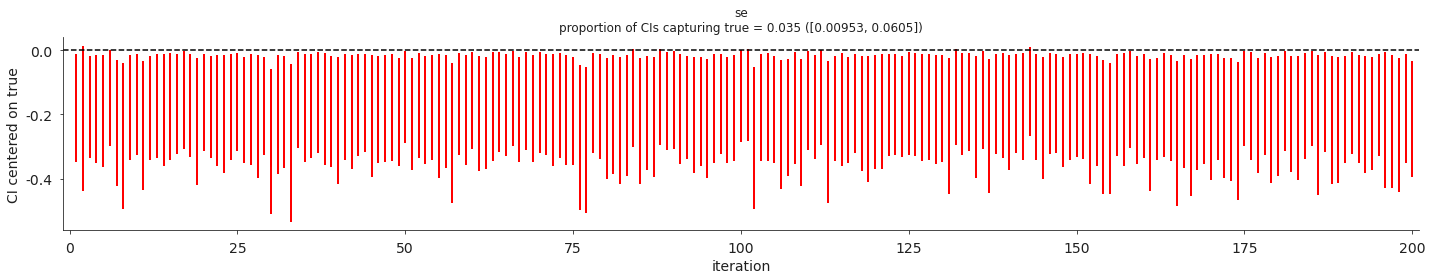

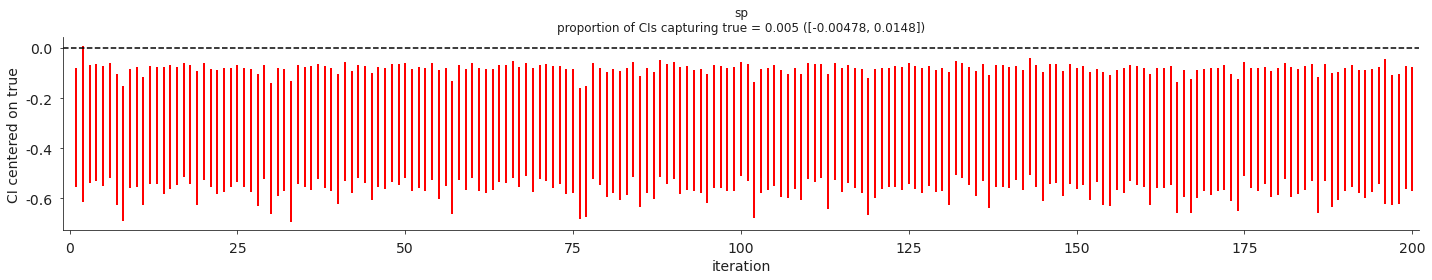

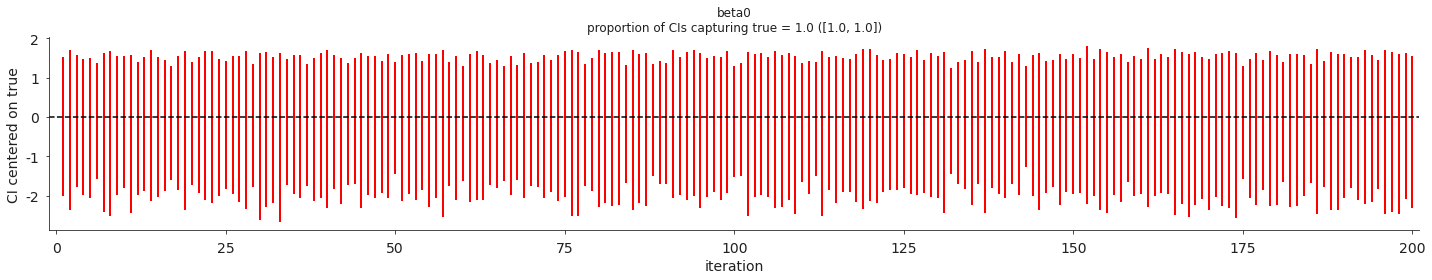

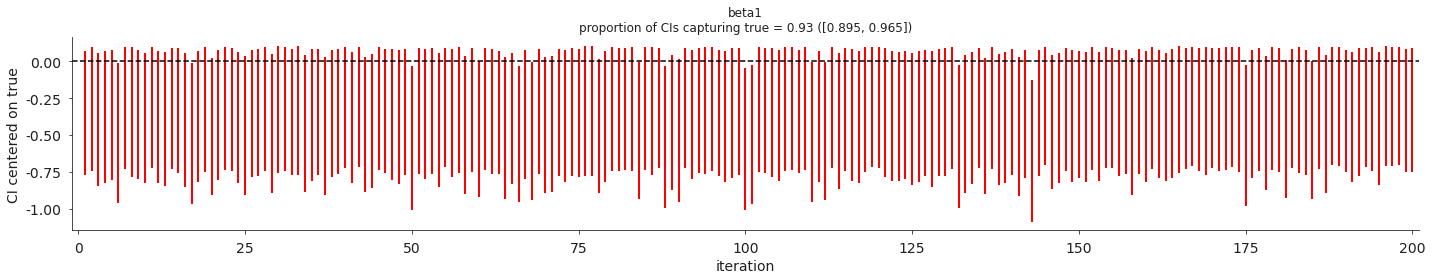

In [18]:
name = 'exp2'
df = unpickle_object(os.path.join(DATA, f'{name}_ci_df.pkl'))
params = ['se', 'sp', 'beta0', 'beta1']

for param in params:
    outpath = os.path.join(HOME, f'figs/{name}_{param}.png')
    create_ci_plots(df, param, outpath)

In [19]:
df

,param,true,lower,upper,prob
0,se,0.950000,0.601459,0.939674,0.950067
1,sp,0.950000,0.396147,0.872156,0.950067
2,beta0,0.500000,-1.514055,2.026864,0.950067
3,beta1,-0.105361,-0.878196,-0.032623,0.950067
4,se,0.950000,0.512224,0.962575,0.950067
...,...,...,...,...,...
795,beta1,-0.105361,-0.854292,-0.021736,0.950067
796,se,0.950000,0.554258,0.917424,0.950067
797,sp,0.950000,0.381339,0.876473,0.950067
798,beta0,0.500000,-1.799903,2.044545,0.950067


## posteriors

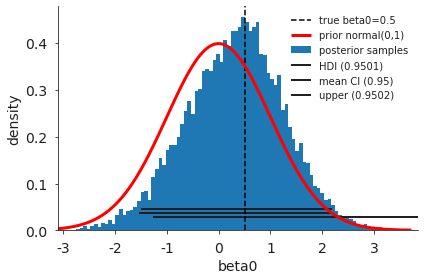

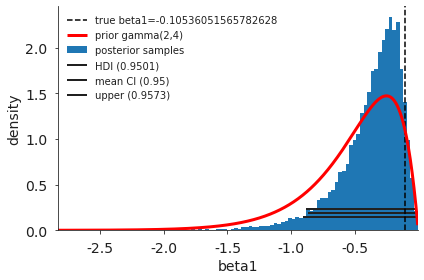

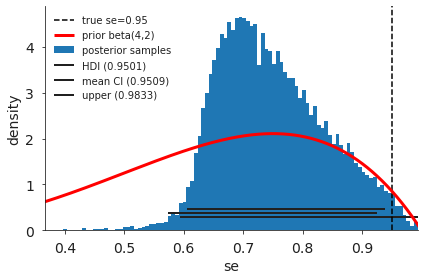

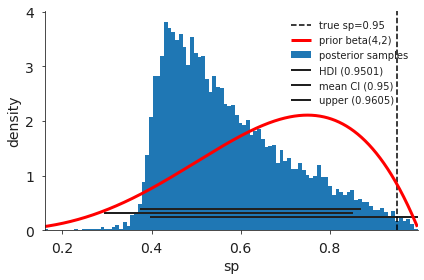

In [56]:
beta0, beta1, se, sp = 0.5, np.log(0.9), 0.95, 0.95
true_params = {'beta0': beta0, 'beta1': beta1, 'se': sp, 'sp': se}
priors = {'beta0': 'normal(0,1)', 'beta1': 'gamma(2,4)',
          'se': 'beta(4,2)', 'sp': 'beta(4,2)'}
idata = unpickle_object(os.path.join(DATA, f'exp2/0.pkl'))
# ar.plot_posterior(idata, var_names=list(true_params.keys()))

for param, true_val in true_params.items():
    fig, axs = posterior_plot(idata, param, true_val, priors[param],
                              upper=True,
                              mean=True
                             )
    plt.tight_layout()
    finalize(axs[0])
    outpath = os.path.join(HOME, f'figs/exp2_{param}_posterior.png')
    plt.savefig(outpath,
                dpi=300
            )

# experiment 3

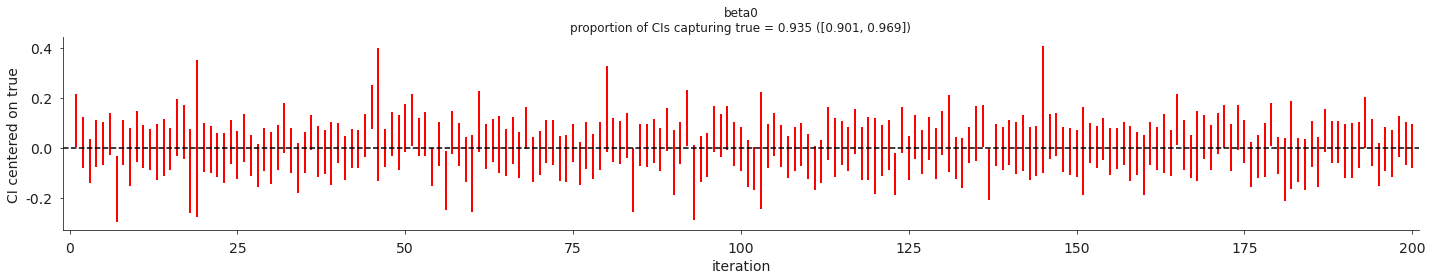

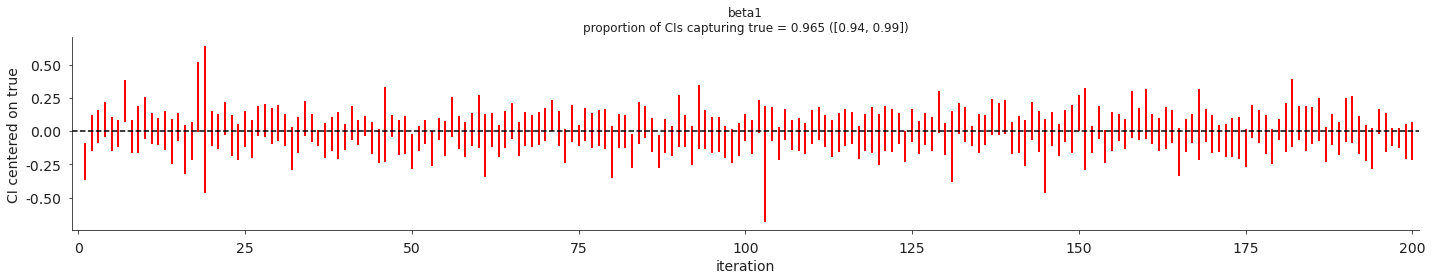

In [17]:
name = 'exp3'
df = unpickle_object(os.path.join(DATA, f'{name}_ci_df.pkl'))
params = ['beta0', 'beta1']

for param in params:
    outpath = os.path.join(HOME, f'figs/{name}_{param}.png')
    create_ci_plots(df, param, outpath)

# experiment 4

# priors

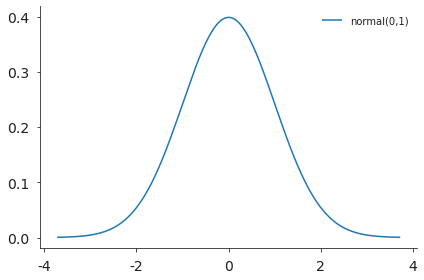

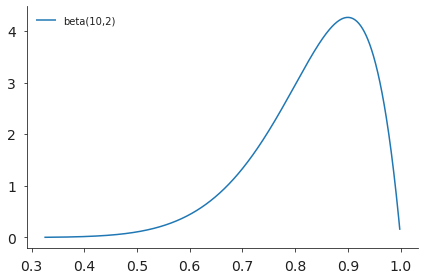

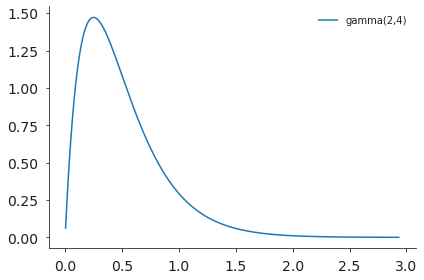

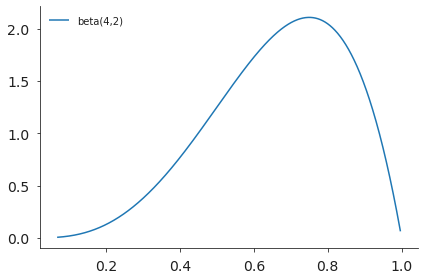

In [10]:

stan = 'normal(0,1)'
pdf = generate_prior(stan)
fig, axs = fig_setup(1,1)
axs[0].plot(pdf[:,0], pdf[:,1], label=stan)
finalize(axs[0])
plt.tight_layout()
plt.savefig(os.path.join(HOME, f'figs/{stan}.png'),
            dpi=300
           )

stan = 'beta(10,2)'
pdf = generate_prior(stan)
fig, axs = fig_setup(1,1)
axs[0].plot(pdf[:,0], pdf[:,1], label=stan)
finalize(axs[0])
plt.tight_layout()
plt.savefig(os.path.join(HOME, f'figs/{stan}.png'),
            dpi=300
           )

stan = 'gamma(2,4)'
pdf = generate_prior(stan)
fig, axs = fig_setup(1,1)
axs[0].plot(pdf[:,0], pdf[:,1], label=stan)
finalize(axs[0])
plt.tight_layout()
plt.savefig(os.path.join(HOME, f'figs/{stan}.png'),
            dpi=300
           )

stan = 'beta(4,2)'
pdf = generate_prior(stan)
fig, axs = fig_setup(1,1)
axs[0].plot(pdf[:,0], pdf[:,1], label=stan)
finalize(axs[0])
plt.tight_layout()
plt.savefig(os.path.join(HOME, f'figs/{stan}.png'),
            dpi=300
           )